# Plot General/Specific results

## Functions

In [1]:
%run -i 'arena.py'

Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

def plotData(file, saveDir, style, label, color, fullRuns, linewidth, ax):
    x = [i for i in range(9)]
    if fullRuns:
        data = load_obj(saveDir, file)
        data = convertFullToMeanError(data)
        accuracy = data[:,0]
        error = data[:,1]
        ax.errorbar(x[:len(data)], accuracy, error, fmt='none', capsize = 4, color = color)
        ax.plot(x[:len(data)], accuracy, style, label = label, color = color, linewidth = linewidth)
    else:    
        data  = load_obj(saveDir,file)
        ax.plot(x[:len(data)],data, style, label = label, color = color, linewidth = linewidth)

def plotIt(stuffToPlot):
    ######### plot results
    for file, saveDir, style, label, color, fullRuns in stuffToPlot:
        plotData(file, saveDir, style, label, color, fullRuns, linewidth, ax)
        
    ######## setup
    yl = ax.get_ylim()
    if ymin != None:
        yl = (ymin,yl[1])
    if ymax != None:
        yl = (yl[0],ymax)
    ax.set_ylim(yl[0], yl[1])
    ax.set_xlabel("Number of transferred layers")
    ax.set_ylabel("Test Accuracy")
    ax.legend()
    plt.minorticks_on()
    ax.grid(b=True, which='major', color='0.5', linestyle='-')
    ax.grid(b=True, which='minor', color='0.9', linestyle='-')

    # set fontsize
    matplotlib.rc('font', size=fontSize)
    matplotlib.rc('axes', titlesize=fontSize)
    
   

## Parameters

In [3]:
############################### parameters
saveDir = 'bengioResults'

######## Misc parm
xSize = 12
ySize = 12
fontSize = 20
linewidth = 1

######### colors
### blue red colors
c3n4p      = '#ff9999'
c3n4       = '#ff0000'
c4n4p      = '#9999ff'
c4n4       = '#0000ff'

c3n4pref   = '#ff9999'
c3n4ref    = '#ff0000'
c4n4pref   = '#9999ff'
c4n4ref    = '#0000ff'

c4scrConv  = '#ff00ff'
c4_10Epoch = '#00ffff'

### bnw colors
# c3n4p = '#000000'
# c3n4 = '#555555'
# c4n4p = '#000000'
# c4n4 = '#555555'
# c3n4pref = '#000000'
# c3n4ref = '#555555'
# c4n4pref = '#000000'
# c4n4ref = '#555555'

### new colors
# c3n4p = '#ff0000'
# c3n4 = '#00ff00'
# c4n4p = '#0000ff'
# c4n4 = '#00ffff'
# c3n4pref = '#ff5555'
# c3n4ref = '#55ff55'
# c4n4pref = '#5555ff'
# c4n4ref = '#55ffff'

########### scale
ymin = 0.6 
ymax = 1.0

######### limits
#outdated from tensorboard logs
acc4scrConvValue = 0.9782
acc4_10EpochValue = 0.96542

######### Prepare plot

# fig = plt.figure(figsize=(xSize,ySize))
# ax = fig.add_subplot(111)

## Run arrays

In [4]:
######### Plot plots using plot function plot
run001 = [
               #3n4+
               ['3n4+-10runAverage', 'bengioResults/1.savedResults/001', '-', '3n4+ 001', c3n4p, False],
               #3n4
               ['3n4-10runAverage',  'bengioResults/1.savedResults/001', '-', '3n4 001',  c3n4,  False],
               #4n4+
               ['4n4+-10runAverage', 'bengioResults/1.savedResults/001', '-', '4n4+ 001', c4n4p, False],
               #4n4
               ['4n4-10runAverage' , 'bengioResults/1.savedResults/001', '-', '4n4 001',  c4n4,  False]
                ]


run002 = [
               #3n4+
#                ['3n4+', 'bengioResults/1.savedResults/002', '-.', '3n4+ 002', c3n4p, True]
               #3n4
#                ['3n4',  'bengioResults/1.savedResults/002', '-.', '3n4 002',  c3n4,  False]
               #4n4+
#                ['4n4+allRuns', 'bengioResults/1.savedResults/002', '-.', '4n4+ 002', c4n4p, True]
               #4n4
               ['4n4allRuns' , 'bengioResults/1.savedResults/002', '-.', '4n4 002',  c4n4,  True]
              ]

run003 = [
               #3n4+
               ['3n4+', 'bengioResults/1.savedResults/003', '--', '3n4+ 003', c3n4p, False],
               #3n4
               ['3n4',  'bengioResults/1.savedResults/003', '--', '3n4 003',  c3n4,  False],
               #4n4+
               ['4n4+', 'bengioResults/1.savedResults/003', '--', '4n4+ 003', c4n4p, False],
               #4n4
               ['4n4' , 'bengioResults/1.savedResults/003', '--', '4n4 003',  c4n4,  False]
              ]

## Draw Plots

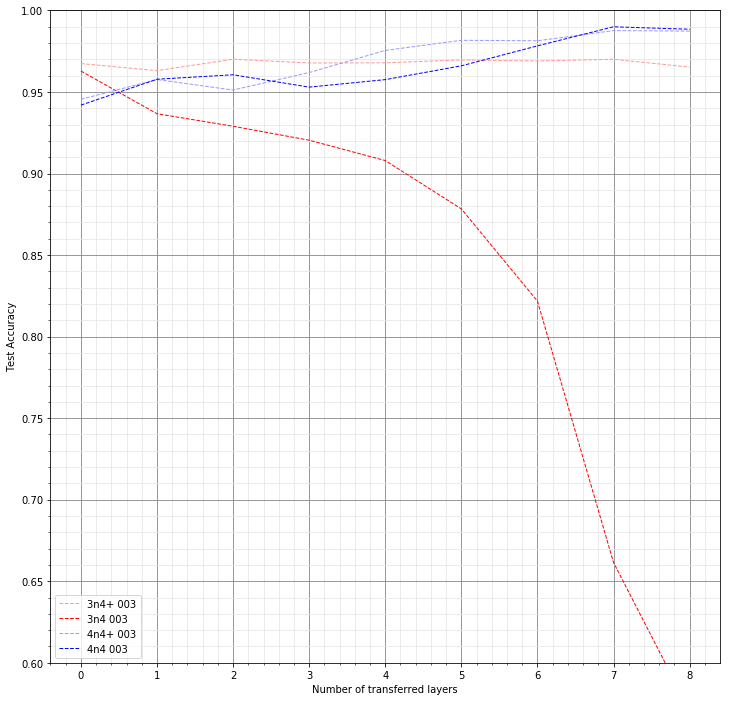

In [5]:
### prepare plot (has to be in same cell as the plot functions)
fig = plt.figure(figsize=(xSize,ySize))
ax = fig.add_subplot(111)

### plot plots
# ruined
# plotIt(run001)
# ruined
# plotIt(run002)
# one run average for comp with 001 and 002
plotIt(run003)

# Calc confidence intervals



In [117]:
### MOVED TO ARENA.PY
def calcStats(measurements):
    μ = np.mean(measurements)
    σ = np.std(measurements, ddof=1)
    max = np.max(measurements)*100
    min = np.min(measurements)*100
    print('max-min', max-min)
    print('σ',σ*100)
    n = len(measurements)
    ste = σ/np.sqrt(n-1)
    error = 1.96 * ste
    print('error',error*100)
    print()
    return [μ, error] 
    
def convertFullToMeanError(allResults):
    return np.array([calcStats(m) for m in allResults])

# Plot tensorboard in Matplotlib example code

In [ ]:
import numpy as np
from tensorflow.python.summary.event_accumulator import EventAccumulator

import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_tensorflow_log(path):

    # Loading too much data is slow...
    tf_size_guidance = {
        'compressedHistograms': 10,
        'images': 0,
        'scalars': 100,
        'histograms': 1
    }

    event_acc = EventAccumulator(path, tf_size_guidance)
    event_acc.Reload()

    # Show all tags in the log file
    #print(event_acc.Tags())

    training_accuracies =   event_acc.Scalars('training-accuracy')
    validation_accuracies = event_acc.Scalars('validation_accuracy')

    steps = 10
    x = np.arange(steps)
    y = np.zeros([steps, 2])

    for i in xrange(steps):
        y[i, 0] = training_accuracies[i][2] # value
        y[i, 1] = validation_accuracies[i][2]

    plt.plot(x, y[:,0], label='training accuracy')
    plt.plot(x, y[:,1], label='validation accuracy')

    plt.xlabel("Steps")
    plt.ylabel("Accuracy")
    plt.title("Training Progress")
    plt.legend(loc='upper right', frameon=True)
    plt.show()


if __name__ == '__main__':
    log_file = "./logs/events.out.tfevents.1456909092.DTA16004"
    plot_tensorflow_log(log_file)